In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy import stats
from numpy.linalg import inv
np.random.seed(1)

In [14]:
N = 25
σ_1 = .2
σ_2 = .5
β = np.array([1,2])

x = np.random.uniform(size=N)
X = sm.add_constant(x)
y_1 = X@β+np.random.normal(0,σ_1,size=N)
y_2 = X@β+np.random.normal(0,σ_2,size=N)

In [15]:
mod_1 = sm.OLS(y_1,X).fit()
mod_2 = sm.OLS(y_2,X).fit()

In [16]:
b_1 = mod_1.params
b_2 = mod_2.params

cov_1 = σ_1**2*inv(X.T@X)
cov_2 = σ_2**2*inv(X.T@X)

In [17]:
def norm_density(cov, ax):
    norm = stats.multivariate_normal(β,cov)
    xx, yy = np.mgrid[0.5:1.5:.01, 1.5:2.5:.01]
    pos = np.dstack((xx,yy))
    zz = norm.pdf(pos)
    ax.contour(xx,yy,zz,levels=4)

In [18]:
def plot_lines(cov, ax, m=20):
    B = stats.multivariate_normal(β,cov).rvs(m)
    x_grid = np.linspace(0,1)
    for i in range(m):
        ax.plot(x_grid,B[i,0]+B[i,1]*x_grid,color='tab:blue', alpha=0.3)

In [19]:
x_grid = np.linspace(0,1)

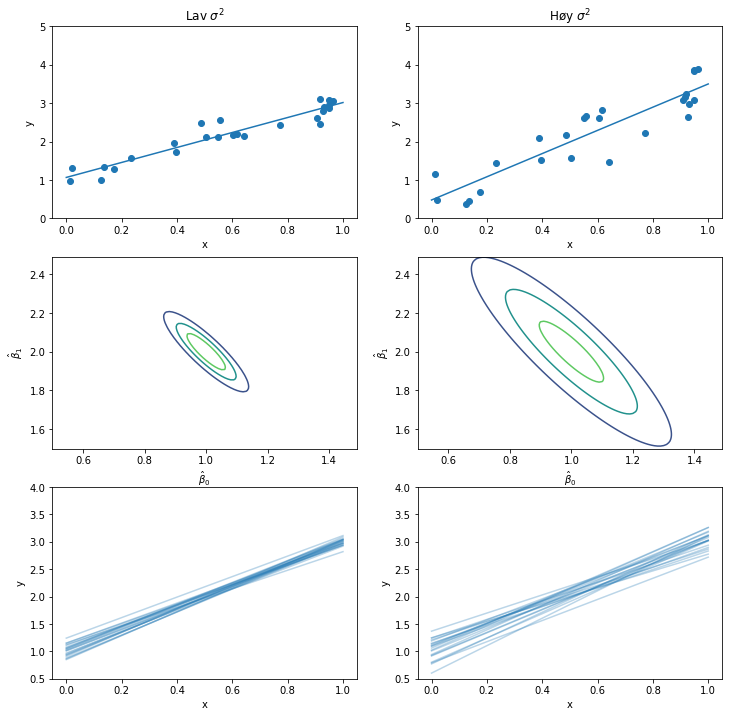

In [24]:
fig, axes = plt.subplots(3,2, figsize=(12,12))
axes = axes.flatten()

axes[0].scatter(x,y_1)
axes[0].plot(x_grid,b_1[0]+b_1[1]*x_grid)
axes[0].set(xlabel='x',ylabel='y',ylim=(0,5))
axes[0].title.set_text(r'Lav $\sigma^2$')

axes[1].scatter(x,y_2)
axes[1].plot(x_grid,b_2[0]+b_2[1]*x_grid)
axes[1].set(xlabel='x',ylabel='y',ylim=(0,5))
axes[1].title.set_text(r'Høy $\sigma^2$')

norm_density(cov_1,axes[2])
axes[2].set(xlabel=r'$\hat{\beta}_0$', ylabel=r'$\hat{\beta}_1$')

norm_density(cov_2,axes[3])
axes[3].set(xlabel=r'$\hat{\beta}_0$', ylabel=r'$\hat{\beta}_1$')

plot_lines(cov_1,axes[4])
axes[4].set(xlabel='x',ylabel='y',ylim=(0.5,4))


plot_lines(cov_2,axes[5])
axes[5].set(xlabel='x',ylabel='y',ylim=(0.5,4))

fig.savefig('linreg_presisjon.pdf')